In [4]:
import pandas as pd

In [2]:
data = pd.read_csv("Бд.csv")

In [3]:
data.head()

,Company,Action,Industry,Country,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Cheil Worldwide,ban on all Russian competition,NGO,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CitiGroup,ban on all Russian competition,NGO,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Citrix,ban on all Russian competition,NGO,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CJ CheilJedang,ban on all Russian competition,NGO,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Claas Group,ban on all Russian competition,NGO,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data[["Company", "Action", "Industry", "Country"]]

In [5]:
data.head()

,Company,Action,Industry,Country
0,Cheil Worldwide,ban on all Russian competition,NGO,United Kingdom
1,CitiGroup,ban on all Russian competition,NGO,France
2,Citrix,ban on all Russian competition,NGO,United States
3,CJ CheilJedang,ban on all Russian competition,NGO,Switzerland
4,Claas Group,ban on all Russian competition,NGO,Switzerland


In [6]:
data.shape

(3882, 4)

In [7]:
data.Action.unique

<bound method Series.unique of 0       ban on all Russian competition
1       ban on all Russian competition
2       ban on all Russian competition
3       ban on all Russian competition
4       ban on all Russian competition
                     ...              
3877                               NaN
3878                               NaN
3879                               NaN
3880                               NaN
3881                               NaN
Name: Action, Length: 3882, dtype: object>

In [8]:
data = data.dropna(axis = 0)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
tmp = []
def word_count(column, arr):
  for i in data[column]:
      arr.append(len(i.split()))
word_count("Action", tmp)

<AxesSubplot:ylabel='Count'>

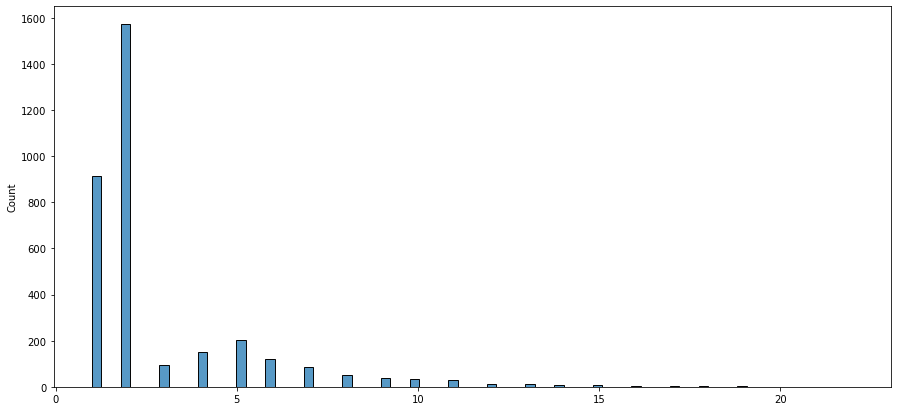

In [11]:
plt.figure(figsize = (15, 7))
sns.histplot(tmp)

In [12]:
data.Action.value_counts().head(20)


Continue Operations                          995
Suspension                                   556
Withdrawal                                   357
Scaling Back                                 262
Exit Completed                               175
Pausing Investments                          119
suspend all shipments to Russia               36
suspend operations in Russia                  33
ban on all Russian competition                 9
exit Russian operations                        9
curtail Russian access to capital markets      9
suspend all operations in Russia               8
exit Russia completely                         7
suspend flights to Russia                      5
exit Russia                                    5
suspend sales to Russia                        5
suspend all sales in Russia                    5
suspend all sales to Russia                    4
withdraw from Russia                           4
suspend new investments in Russia              4
Name: Action, dtype:

**WORDCLOUD**

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def tokenize(column):
  data[column] = [word_tokenize(sent) for sent in data[column]]
tokenize("Action")
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tigran_oganesyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Company,Action,Industry,Country
0,Cheil Worldwide,"[ban, on, all, Russian, competition]",NGO,United Kingdom
1,CitiGroup,"[ban, on, all, Russian, competition]",NGO,France
2,Citrix,"[ban, on, all, Russian, competition]",NGO,United States
3,CJ CheilJedang,"[ban, on, all, Russian, competition]",NGO,Switzerland
4,Claas Group,"[ban, on, all, Russian, competition]",NGO,Switzerland


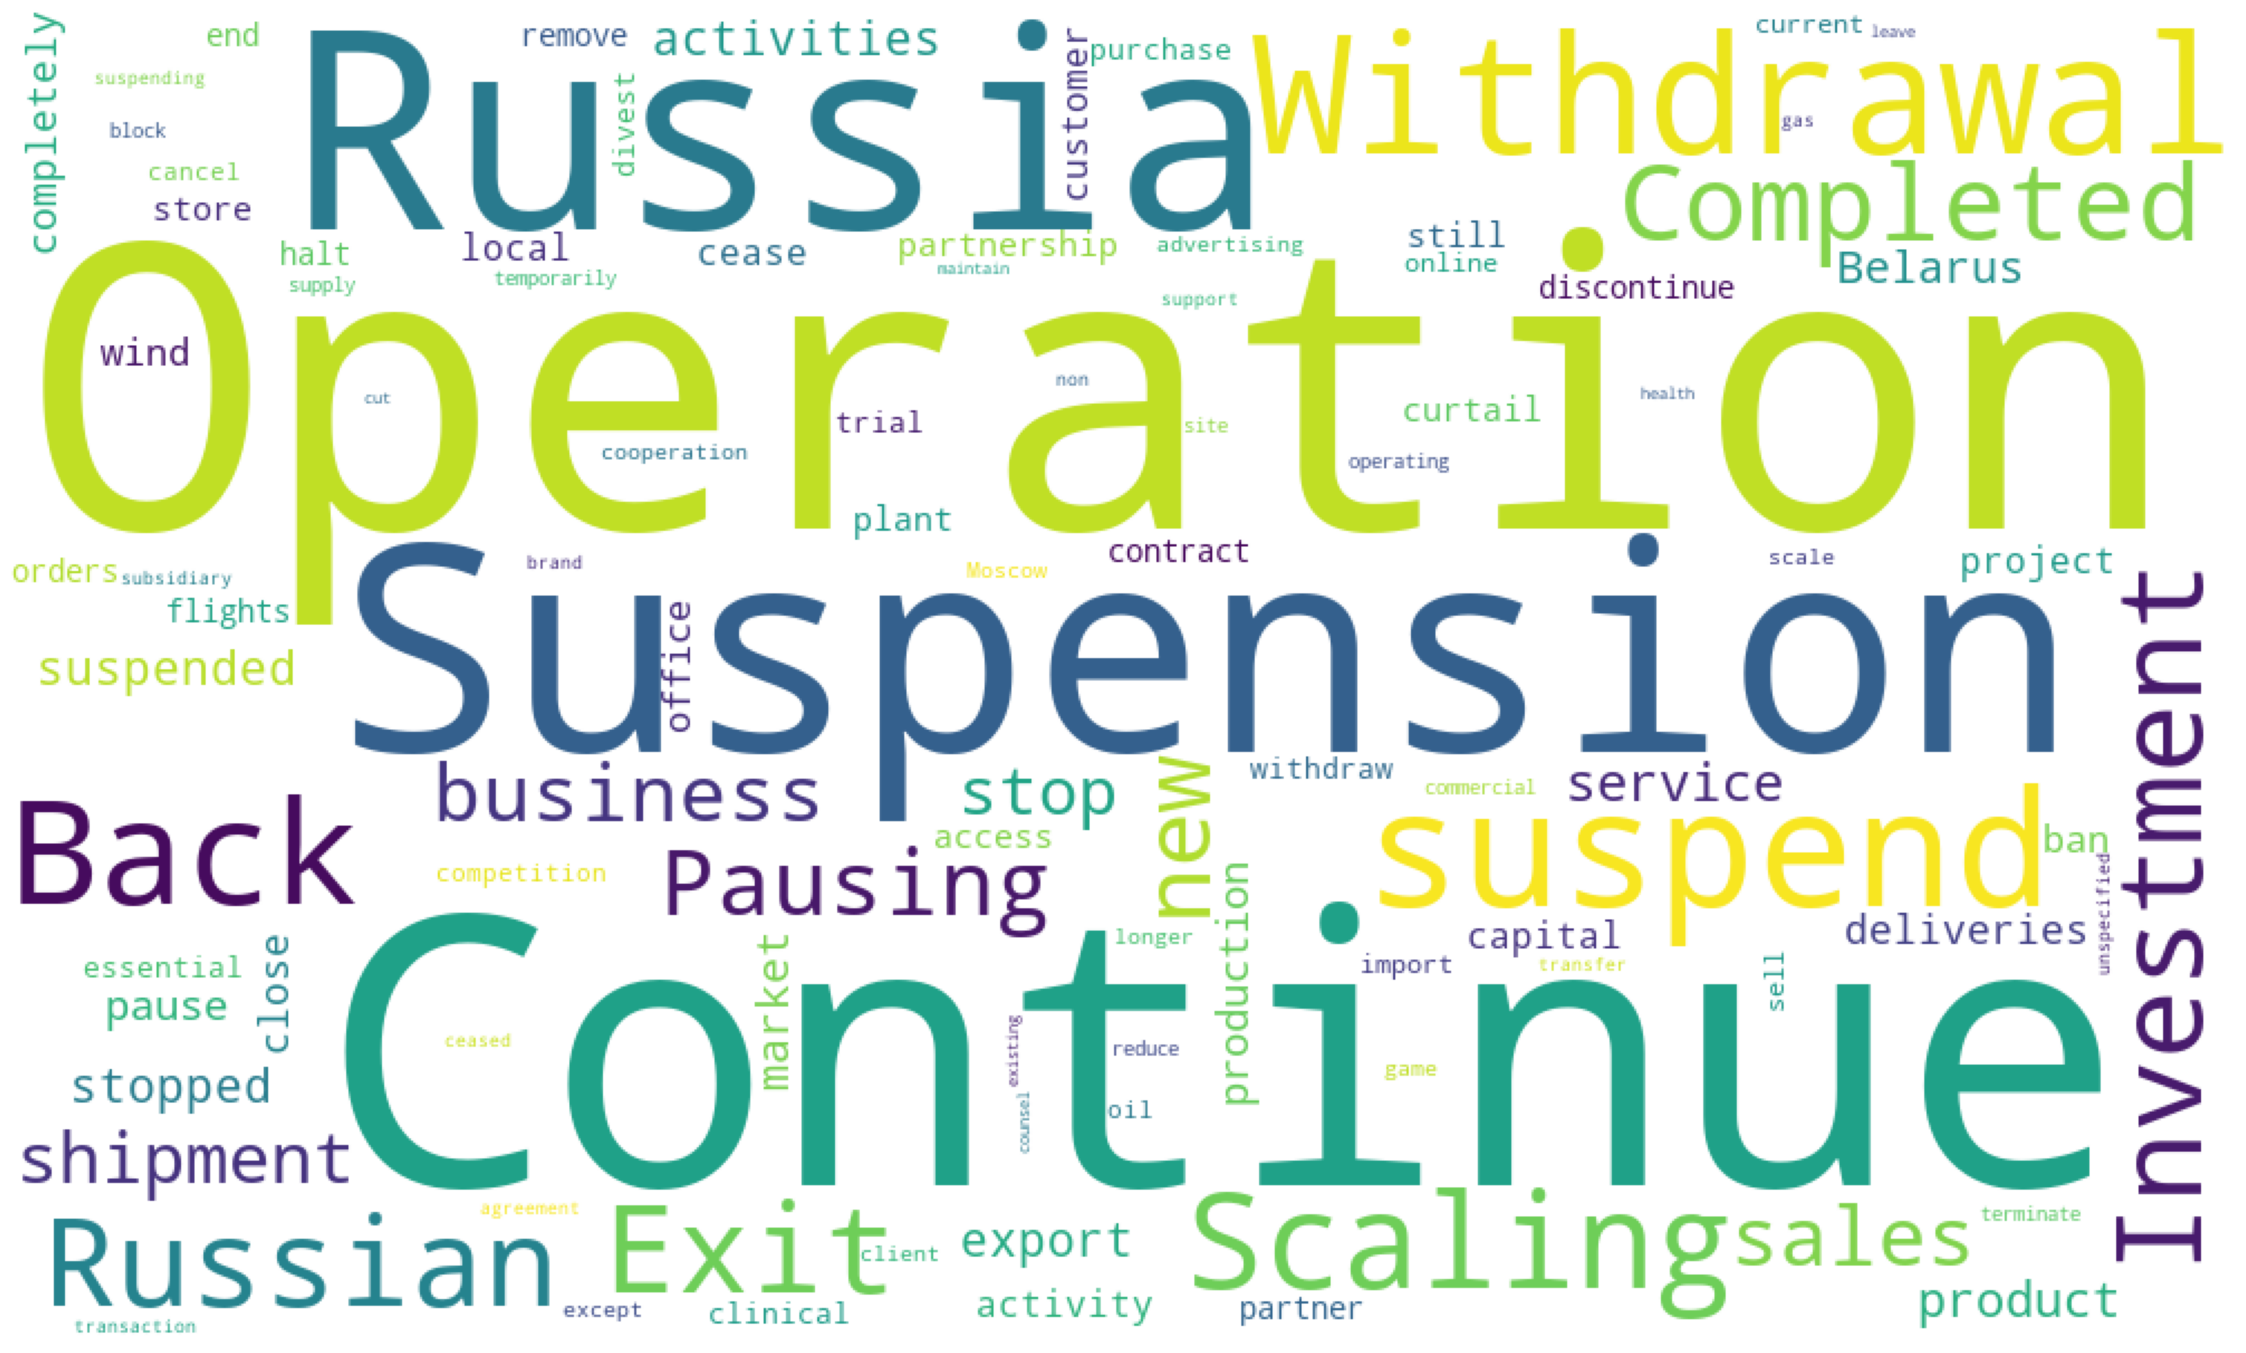

In [14]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

comment_words = ''
stop_words = set(STOPWORDS)

text = ' '.join(data['Action'].sum())
wordcloud = WordCloud(width= 1000, height = 600, max_words=100,
                      random_state=1, background_color='white', colormap='viridis_r',
                      collocations=False, stopwords = stop_words).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [15]:
keywords_arr = ["continue", "suspension", "stopped", "withdrawal", "exit", "back", "pausing", "ban", "withdraw", "ceased", "cease", "completed", "scaling"]

In [18]:
marked_arr = []
for i in data.Action:
  if "continue" in i:
    marked_arr.append(1)
  elif "suspension" in i or "suspend" in i or "pausing" in i:
    marked_arr.append(2)
  else:
    marked_arr.append(0)
print(len(marked_arr), data.shape)

NameError: name 'data' is not defined

In [17]:
import numpy as np
marked_arr = np.asarray(marked_arr)


In [18]:
data["tone"] = marked_arr

In [20]:
data.tone.value_counts()

0    2983
2     335
1      26
Name: tone, dtype: int64

In [33]:
marked_data = pd.read_csv('marked_data.csv')
marked_data = marked_data.rename(columns = {'tone' : 'Operations'})

In [36]:
marked_data = marked_data.replace({0: 'exited', 1:'continued', 2: 'suspended'})
marked_data.Operations.value_counts()

exited       1311
continued    1021
suspended    1012
Name: Operations, dtype: int64

/Users/tigran_oganesyan/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Industry', ylabel='count'>

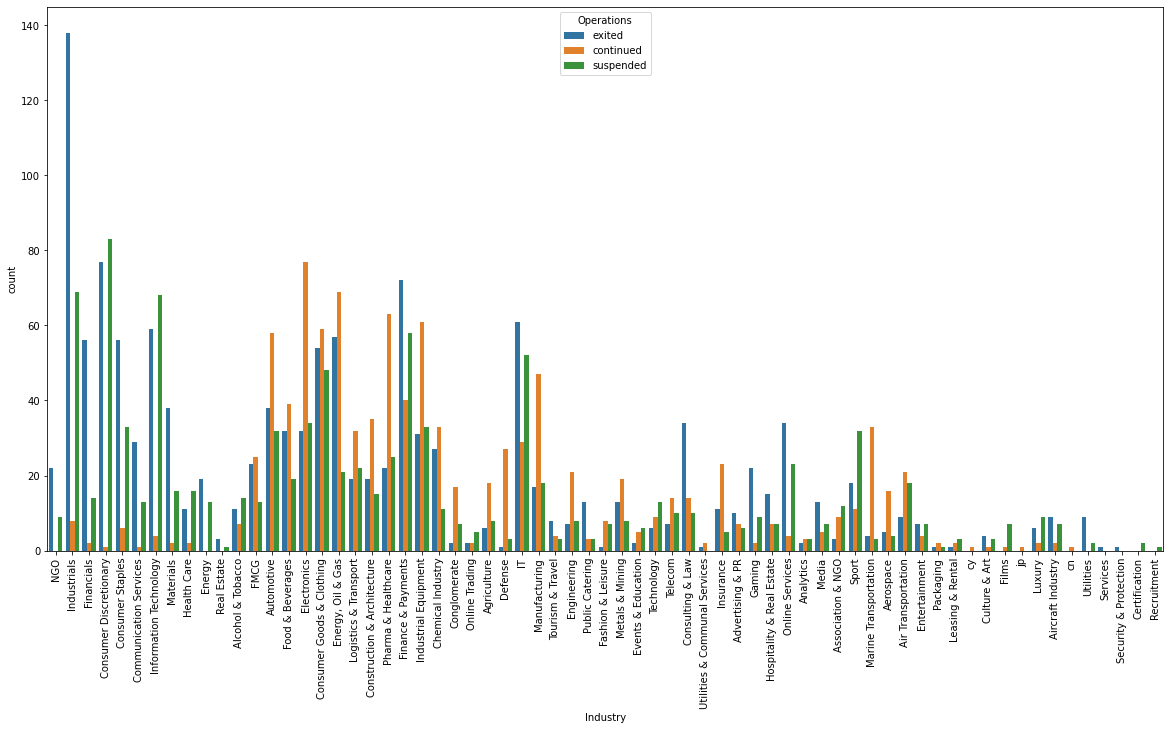

In [37]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90)
sns.countplot(marked_data.Industry, hue = marked_data.Operations)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/tigran_oganesyan/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


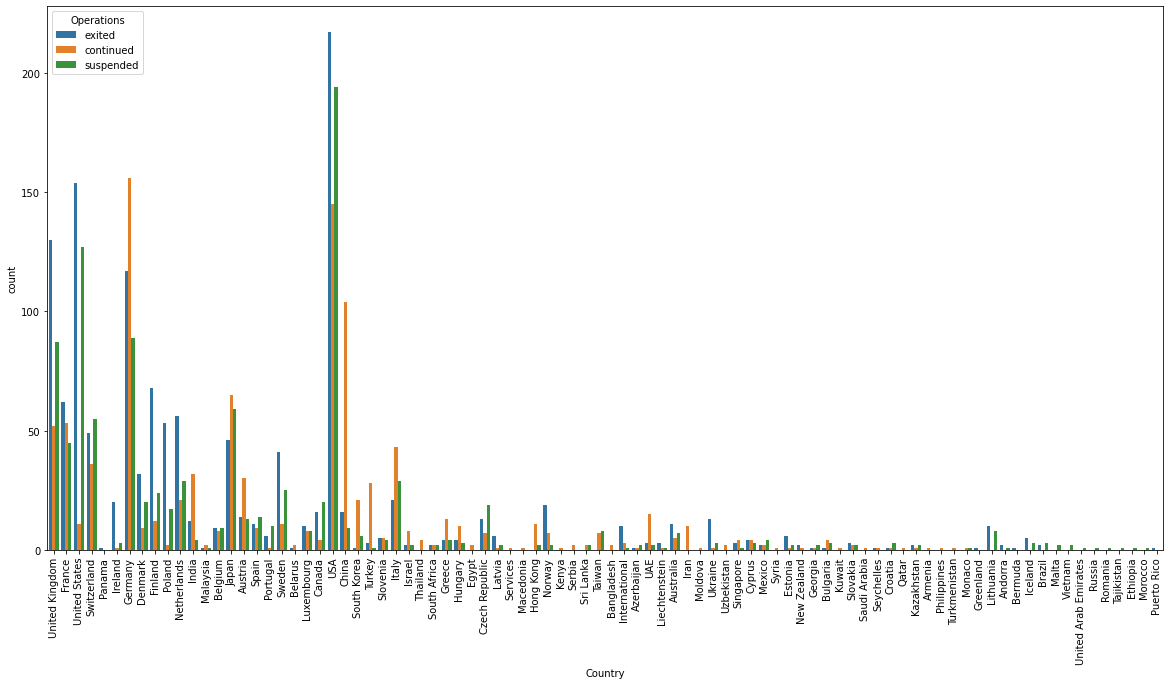

In [38]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90)
plt.legend(loc=9)
sns.countplot(marked_data.Country, hue = marked_data.Operations)
plt.show()

In [56]:
marked_data.head()

,Unnamed: 0,Company,Action,Industry,Country,tone
0,0,Cheil Worldwide,"['ban', 'on', 'all', 'russian', 'competition']",NGO,United Kingdom,0
1,1,CitiGroup,"['ban', 'on', 'all', 'russian', 'competition']",NGO,France,0
2,2,Citrix,"['ban', 'on', 'all', 'russian', 'competition']",NGO,United States,0
3,3,CJ CheilJedang,"['ban', 'on', 'all', 'russian', 'competition']",NGO,Switzerland,0
4,4,Claas Group,"['ban', 'on', 'all', 'russian', 'competition']",NGO,Switzerland,0


In [58]:
marked_data.tone.value_counts()

0    1311
1    1021
2    1012
Name: tone, dtype: int64